1.
**Business Case:** As a company specializing in marine conservation and eco-tourism, we aim to leverage shark attack data to promote responsible shark tourism and support shark conservation efforts.
**Problem Statement:**
In the face of declining tourism levels in our area, there is a pressing need to revitalize the local economy while simultaneously promoting responsible shark tourism and supporting shark conservation efforts. However, without a data-driven understanding of shark activity patterns and attack incidences, it is challenging to identify suitable locations for shark diving experiences that offer both excitement for tourists and safety for both humans and sharks.
**Hypothesis:**
 we hypothesize that it is possible to identify high shark activity areas with low incidence rates of shark attacks, thereby enabling us to strategically select locations for shark diving experiences that offer thrilling encounters with sharks while minimizing risks to tourists and sharks alike.


In [24]:
import pandas as pd
url = ("https://www.sharkattackfile.net/spreadsheets/GSAF5.xls")
df = pd.read_excel(url)
df

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,...,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,...,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,...,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,...,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,...,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# master code
def remove_whitespace_from_column_names(df):
  # Remove leading and trailing spaces from column names
  df2 = df.copy()
  df2.columns = [column.strip() for column in df2.columns]
  return df2

df = remove_whitespace_from_column_names(df)


def trim_and_lower_strings(df):
  df2 = df.copy()
  # Use applymap() with a lambda function to trim and lower strings in all columns
  df2 = df2.applymap(lambda x: x.strip() if isinstance(x, str) else x)
  df2 = df2.applymap(lambda x: x.lower() if isinstance(x, str) else x)
  return df2

df = trim_and_lower_strings(df)

# Drop unnecessary columns
cols_to_drop = [
    "Source",
    "pdf",
    "href formula",
    "href",
    "Case Number",
    "Case Number.1",
    "original order",
    "Unnamed: 11",
    "Unnamed: 21",
    "Unnamed: 22",
    "Name",
    "Time"
    ]

df.drop(columns=cols_to_drop, inplace=True)


# Delete rows where all entries are null
df = df[~df.isna().all(axis=1)]


# Drop rows where the value for "Year" is invalid and convert remaining to integer
df.dropna(subset=['Year'], inplace=True)
df["Year"] = df[["Year"]].applymap(int)


# Replace some values in the Country column
replace_values = {
    "united arab emirates (uae)": "united arab emirates",
    "england": "united kingdom",
    "scotland": "united kingdom"
}

df["Country"].replace(replace_values, inplace=True)


# Clean the Species column
def set_species(df):
    df2 = df.copy()
    df2["Species"] = ["unknown" if pd.isna(item) else
                      "white" if "white" in item.lower() else
                      "bull" if "bull" in item.lower() else
                      "tiger" if "tiger" in item.lower() else
                      "reef" if "blacktip" in item.lower() or "blackfin" in item.lower() or "reef" in item.lower() else
                      "bronze whaler" if "bronze" in item.lower() or "whaler" in item.lower() else
                      "nurse" if "nurse" in item.lower() else
                      "hammerhead" if "hammer" in item.lower() else
                      "lemon" if "lemon" in item.lower() else
                      "spinner" if "spinner" in item.lower() else
                      "wobbegong" if "wobbegong" in item.lower() else
                      "mako" if "mako" in item.lower() else
                      "sevengill" if "sevengill" in item.lower() else
                      "zambesi" if "zambesi" in item.lower() else
                      "raggedtooth" if "raggedtooth" in item.lower() else
                      "blue" if "blue" in item.lower() else
                      "copper" if "copper" in item.lower() else
                      "brown / sandbar" if "brown" in item.lower() or "sandbar" in item.lower() else
                      "dog" if "dog" in item.lower() else
                      "reef" if "grey" in item.lower() else
                      "unknown" for item in df2["Species"]]
    return df2

df = set_species(df)


#Change column name from "Type" to "Provoked"
df.rename(columns = {'Type': 'Provoked'}, inplace = True)

#Replace values in column "Provoked" to either 'yes', 'no' or 'unknown'
df['Provoked'] = df['Provoked'].apply(lambda x: 'yes' if x == 'provoked' else ('no' if x == 'unprovoked' else 'unknown'))


# Modify the Injury column
df["Injury"] = df["Injury"].apply(lambda x: "non-fatal" if pd.isna(x) else ("fatal" if x == "fatal" else "non-fatal"))


# Modify the Sex column
df['Sex'] = df['Sex'].apply(lambda x: 'm' if x == 'm' else ('f' if x == 'f' else 'unknown'))

# RYAN
#Converting age column to int
df["Age"] = df["Age"].apply(lambda x: int(x) if str(x).isdigit() else x if str(x).isdigit() else "na")


df

,Date,Year,Provoked,Country,State,Location,Activity,Sex,Age,Injury,Species
0,15 mar 2024,2024,no,australia,queensland,bargara beach,swimming,f,13,non-fatal,tiger
1,04 mar 2024,2024,no,usa,hawaii,"old man's, waikiki",surfing,m,na,non-fatal,tiger
2,02 mar-2024,2024,no,usa,hawaii,"rainbows, oahu",swimming,f,11,non-fatal,unknown
3,25 feb-2024,2024,no,australia,western australia,"sandlnd island, jurian bay",NaN,f,46,non-fatal,tiger
4,14 feb-2024,2024,no,india,maharashtra,"vaitarna river, palghar district",fishing,m,32,non-fatal,bull
...,...,...,...,...,...,...,...,...,...,...,...
6939,before 1903,0,no,australia,western australia,roebuck bay,diving,m,na,fatal,unknown
6940,before 1903,0,no,australia,western australia,NaN,pearl diving,m,na,fatal,unknown
6941,1900-1905,0,no,usa,north carolina,ocracoke inlet,swimming,m,na,fatal,unknown
6942,1883-1889,0,no,panama,NaN,"panama bay 8ºn, 79ºw",NaN,m,na,fatal,unknown


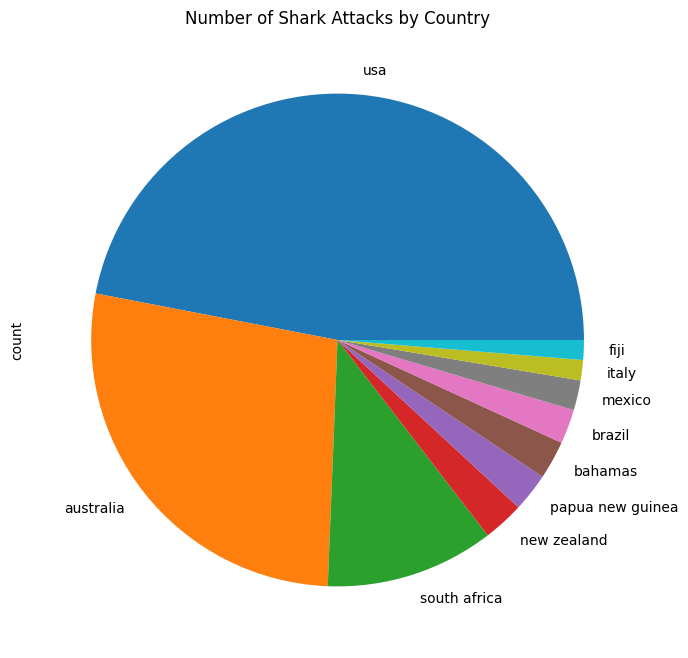

None

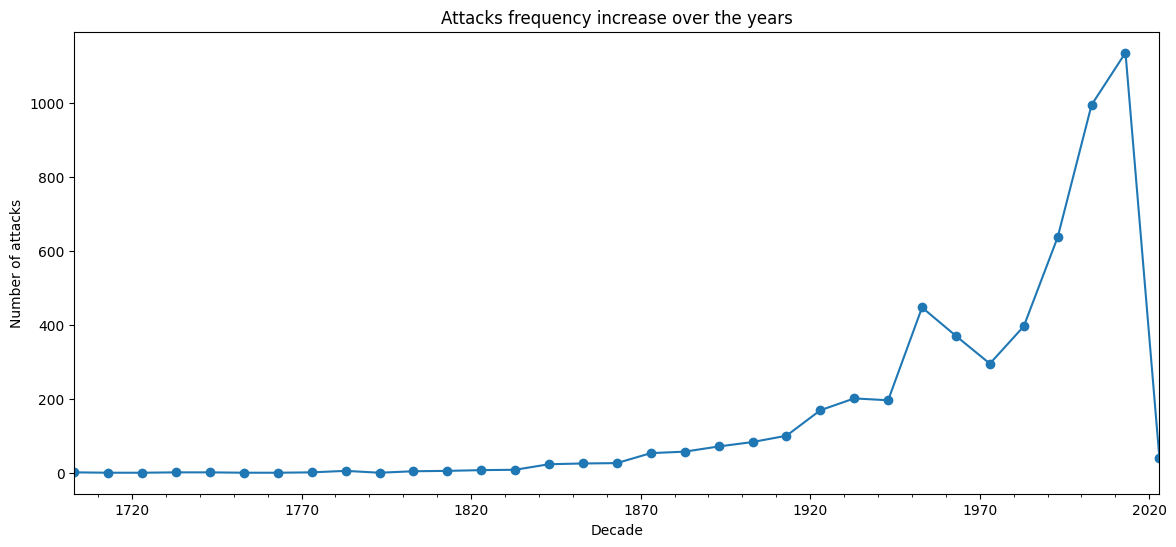

None


Note: This data is not considering attacks with 0 irregular recording dates.


In [26]:
"""
Oscar working on the graphics here
"""
import matplotlib.pyplot as plt

# Total of irregular dates
total_imprecise_records = df['Date'].isna().sum()

#PIE CHART
attacks_per_country = df['Country'].value_counts().head(10)  # Count attacks per country, show top 10
attacks_per_country.plot(kind='pie', figsize=(10, 8))
plt.title('Number of Shark Attacks by Country')
display(plt.show())

#df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y', errors='coerce')
attacks_per_date = df.set_index('Date').resample('10AS').size()
plt.figure(figsize=(14, 6))
attacks_per_date.plot(marker='o', linestyle='-')
plt.title('Attacks frequency increase over the years')
plt.xlabel('Decade')
plt.ylabel('Number of attacks')
display(plt.show())


import plotly.express as px

# LINEAR CHART
attacks_per_country = df['Country'].value_counts().reset_index()
attacks_per_country.columns = ['Country', 'Attacks']


# COUNTRIES MAP


fig = px.choropleth(attacks_per_country,
                    locations='Country',
                    locationmode='country names',
                    color='Attacks',
                    hover_name='Country',
                    color_continuous_scale='YlOrRd',
                    title='Shark Attacks by Country')


#fig.add_annotation(text=f'Total Imprecise Records: {total_imprecise_records}',
                  # x=0.5, y=-0.1, showarrow=False)

fig.show()
print()
print(f"Note: This data is not considering attacks with {total_imprecise_records} irregular recording dates.")

In [ ]:
""" Jorge working on grouping the attacks by country, state and injury, also places with the most and least attacks """

In [27]:
print()
display(df)

grouped_df = df.groupby(['Country', 'State', 'Injury']).size().reset_index(name='Count')

most_injuries = grouped_df.loc[grouped_df['Count'].idxmax()]

least_injuries = grouped_df.loc[grouped_df['Count'].idxmin()]

median_injuries_value = grouped_df['Count'].median()

median_injuries = grouped_df.loc[grouped_df['Count'] == median_injuries_value]

display(grouped_df)
print()

display("Country and State with the most injuries:")
display(most_injuries)
print()

display("Country and State with the least injuries:")
display(least_injuries)
print()

display("Country and State with the median number of injuries:")
display(median_injuries)

,Date,Year,Provoked,Country,State,Location,Activity,Sex,Age,Injury,Species
0,NaT,2024,no,australia,queensland,bargara beach,swimming,f,13,non-fatal,tiger
1,NaT,2024,no,usa,hawaii,"old man's, waikiki",surfing,m,na,non-fatal,tiger
2,NaT,2024,no,usa,hawaii,"rainbows, oahu",swimming,f,11,non-fatal,unknown
3,NaT,2024,no,australia,western australia,"sandlnd island, jurian bay",NaN,f,46,non-fatal,tiger
4,NaT,2024,no,india,maharashtra,"vaitarna river, palghar district",fishing,m,32,non-fatal,bull
...,...,...,...,...,...,...,...,...,...,...,...
6939,NaT,0,no,australia,western australia,roebuck bay,diving,m,na,fatal,unknown
6940,NaT,0,no,australia,western australia,NaN,pearl diving,m,na,fatal,unknown
6941,NaT,0,no,usa,north carolina,ocracoke inlet,swimming,m,na,fatal,unknown
6942,NaT,0,no,panama,NaN,"panama bay 8ºn, 79ºw",NaN,m,na,fatal,unknown


,Country,State,Injury,Count
0,admiralty islands,manus island,non-fatal,1
1,american samoa,tutuila island,fatal,1
2,american samoa,tutuila island,non-fatal,2
3,angola,west africa,non-fatal,1
4,antigua,st john's,non-fatal,1
...,...,...,...,...
1028,western samoa,upolu island,fatal,1
1029,yemen,aden,fatal,3
1030,yemen,aden,non-fatal,4
1031,yemen,muhafazat hadramawt,non-fatal,1


'Country and State with the most injuries:'

Country          usa
State        florida
Injury     non-fatal
Count           1150
Name: 964, dtype: object

'Country and State with the least injuries:'

Country    admiralty islands
State           manus island
Injury             non-fatal
Count                      1
Name: 0, dtype: object

'Country and State with the median number of injuries:'

,Country,State,Injury,Count
0,admiralty islands,manus island,non-fatal,1
1,american samoa,tutuila island,fatal,1
3,angola,west africa,non-fatal,1
4,antigua,st john's,non-fatal,1
5,argentina,buenos aires province,non-fatal,1
...,...,...,...,...
1025,vietnam,ba ria-vung tau province,non-fatal,1
1027,vietnam,khánh hòa province,non-fatal,1
1028,western samoa,upolu island,fatal,1
1031,yemen,muhafazat hadramawt,non-fatal,1
